<a href="https://colab.research.google.com/github/sehuwo/Diplomado/blob/main/Diplomado_modulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import itertools as it

def soles(n,s):
  Omega = list(it.product("AS", repeat=n))  #n es el número de lanzamientos
  res = [om for om in Omega if om.count('S') >= s] #s es el número de soles que se buscan en mayor o igual
  p = len(res) / len(Omega)
  return res, p

n = int(input("¿Cuantas veces se lanzará la moneda? "))
s = int(input("¿Al menos cuantos soles busca? "))
print(soles(n,s))


¿Cuantas veces se lanzará la moneda? 3
¿Al menos cuantos soles busca? 2
([('A', 'S', 'S'), ('S', 'A', 'S'), ('S', 'S', 'A'), ('S', 'S', 'S')], 0.5)


La diferencia de las caras es mayor que 1

In [ ]:
import pandas as pd
from itertools import product
from fractions import Fraction
from collections import defaultdict

def P(A, Omega):
  P = Fraction(len(A),len(Omega))
  return P

def dif(n):
  L = [i for i in range(1,7)]
  Omega = set(product(L, repeat=n))
  S = {(i,j): i-j for i,j in Omega}
  dS = defaultdict(set)
  for i,j in S.items():
    if j > 1:
      dS[j].add(i)
  leyS = {k : P(A,Omega) for k,A in dS.items() }
  leyS = pd.Series(leyS)
  leyS = leyS.sort_index()
  return leyS

print(dif(2))

2     1/9
3    1/12
4    1/18
5    1/36
dtype: object


La suma de las caras sea par


In [ ]:
import pandas as pd
from itertools import product
from fractions import Fraction
from collections import defaultdict

def P(A, Omega):
  P = Fraction(len(A),len(Omega))
  return P

def par(n):
  L = [i for i in range(1,7)]
  Omega = set(product(L, repeat=n))
  S = {(i,j): i+j for i,j in Omega}
  dS = defaultdict(set)
  for i,j in S.items():
    if j % 2 == 0:
      dS[j].add(i)
  leyS = {k : P(A,Omega) for k,A in dS.items() }
  leyS = pd.Series(leyS)
  leyS = leyS.sort_index()
  return leyS

print(par(2))

2     1/36
4     1/12
6     5/36
8     5/36
10    1/12
12    1/36
dtype: object


Verificación

In [ ]:
import pandas as pd
from itertools import product
from fractions import Fraction
from collections import defaultdict

def P(A, Omega):
  P = Fraction(len(A),len(Omega))
  return P

def dif(n):
  L = [i for i in range(1,7)]
  Omega = set(product(L, repeat=n))
  S = {(i,j): i-j for i,j in Omega}
  dS = defaultdict(set)
  for i,j in S.items():
    dS[j].add(i)
  leyS = {k : P(A,Omega) for k,A in dS.items() }
  sum = 0
  for i,j in leyS.items():
    sum = sum + j
  leyS = pd.Series(leyS)
  leyS = leyS.sort_index()
  return sum

def par(n):
  L = [i for i in range(1,7)]
  Omega = set(product(L, repeat=n))
  S = {(i,j): i+j for i,j in Omega}
  dS = defaultdict(set)
  for i,j in S.items():
    dS[j].add(i)
  leyS = {k : P(A,Omega) for k,A in dS.items() }
  sum = 0
  for i,j in leyS.items():
    sum = sum + j
  leyS = pd.Series(leyS)
  leyS = leyS.sort_index()
  return sum

print("La suma de las probabilidades de los eventos para la diferencia de las caras es mayor que uno es ", par(2))
print("La suma de las probabilidades de los eventos para la suma de las caras sea par es ", dif(2))

La suma de las probabilidades de los eventos para la diferencia de las caras es mayor que uno es  1
La suma de las probabilidades de los eventos para la suma de las caras sea par es  1


Función de Distribución Acumulada

$$F_{X}(x)=\mathbb{P}(X\le x)=\begin{cases}
		0 &\quad \text{si } x<2 \\
		\frac{1}{36} &\quad \text{si } x \leq 2\\ \frac{3}{36} &\quad \text{si } x \leq 3 \\ \frac{6}{36} &\quad \text{si } x \leq 4 \\ \frac{10}{36} &\quad \text{si } x \leq 5 \\ \frac{15}{36} &\quad \text{si } x \leq 6 \\ \frac{21}{36} &\quad \text{si } x \leq 7 \\ \frac{26}{36} &\quad \text{si } x \leq 8 \\ \frac{30}{36} &\quad \text{si } x \leq 9 \\ \frac{33}{36} &\quad \text{si } x \leq 10 \\ \frac{35}{36} &\quad \text{si } x \leq 11 \\ 1 &\quad \text{si } x \leq 12
	\end{cases}$$

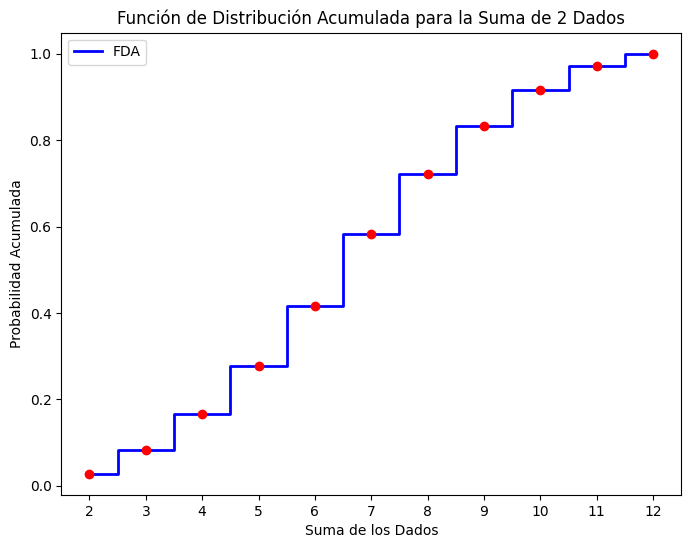

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Valores posibles de la suma de dos dados
suma_dados = np.arange(2, 13)

# Probabilidades de cada suma
p = np.array([1/36, 2/36, 3/36, 4/36, 5/36, 6/36,
                           5/36, 4/36, 3/36, 2/36, 1/36])


fda = np.cumsum(p)


plt.figure(figsize=(8, 6))
plt.step(suma_dados, fda, where="mid", label='FDA', color='b', linewidth=2)
plt.scatter(suma_dados, fda, color='r', zorder=5)
plt.title('Función de Distribución Acumulada para la Suma de 2 Dados')
plt.xlabel('Suma de los Dados')
plt.ylabel('Probabilidad Acumulada')
plt.xticks(suma_dados)
plt.legend()

plt.show()
